In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [3]:
train_df.shape

(87554, 188)

In [4]:
test_df.shape

(21892, 188)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
type(train_df[187])

pandas.core.series.Series

In [8]:
train_df[187]=train_df[187].astype(int)
values=train_df[187].value_counts()
print(values)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


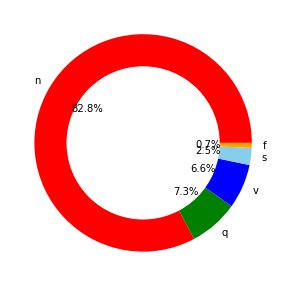

In [9]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(values, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

We could clearly see clearly notice that normal(n=82.8%) occupy most of the part. This 
can make the our training model biased.So,balancing the data is hugely required.

So,there are many ways to fix this imbalnce.
1. Use the right evaluation metrics:
    we can't use the accuracy metrics here.Our training data is the one illustrated in graph above. If accuracy is used to      measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously, this model won’t provide any valuable information for us.Other metrics can be used:
    -F1 score
    -confusion matrix
    -recall score
    -AUC-relation between true-positive rate and false positive rate.
2. Resample the training set:



# balancing the data

In [10]:
from sklearn.utils import resample
S=train_df[train_df[187]==1]
V=train_df[train_df[187]==2]
F=train_df[train_df[187]==3]
Q=train_df[train_df[187]==4]
N=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

S_upsample=resample(S,replace=True,n_samples=20000,random_state=123)
V_upsample=resample(V,replace=True,n_samples=20000,random_state=124)
F_upsample=resample(F,replace=True,n_samples=20000,random_state=125)
Q_upsample=resample(Q,replace=True,n_samples=20000,random_state=126)

train=pd.concat([N,S_upsample,V_upsample,F_upsample,Q_upsample])

In [20]:
type(train)

pandas.core.frame.DataFrame

In [11]:
X_train=train[187].value_counts()
print(X_train)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


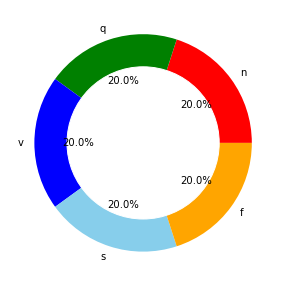

In [12]:
plt.figure(figsize=(10,5))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(X_train, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
c=train.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [14]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
65992,0.990000,0.936000,0.738000,0.556000,0.354000,0.164000,0.044000,0.012000,0.024000,0.036000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74096,1.000000,0.884328,0.264925,0.026119,0.085821,0.134328,0.115672,0.126866,0.179104,0.164179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75707,0.912602,1.000000,0.941057,0.873984,0.843496,0.813008,0.794715,0.691057,0.491870,0.260163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80501,0.974775,1.000000,0.655856,0.335135,0.207207,0.153153,0.131532,0.115315,0.099099,0.093694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
81371,1.000000,0.471429,0.446429,0.471429,0.485714,0.482143,0.471429,0.460714,0.407143,0.292857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [15]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

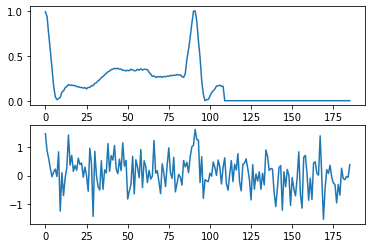

In [16]:
temp=c.iloc[0,:186]
data_noised=add_gaussian_noise(temp)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(data_noised)

plt.show()

In [17]:
from keras.utils.np_utils import to_categorical
target_train=train[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [18]:
X_train_main=train.iloc[:,:186].values
X_test_main=test_df.iloc[:,:186].values



In [21]:
for i in range(len(train)):
    X_train_main[i,:186]= add_gaussian_noise(X_train_main[i,:186])
X_train_real = X_train_main.reshape(len(X_train_main), X_train_main.shape[1],1)
X_test_real = X_test_main.reshape(len(X_test_main), X_test_main.shape[1],1)

In [22]:
X_train_real.shape

(100000, 186, 1)

# defining model

In [23]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras


In [24]:
model=models.Sequential([
    layers.Conv1D(64,(6), activation='relu', input_shape=(186,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(pool_size=(3), strides=(2), padding="same"),
    layers.Conv1D(64, (3), activation='relu' ),
    layers.BatchNormalization(),
    layers.MaxPool1D(pool_size=(2), strides=(2), padding="same"),
    layers.Conv1D(64,(3), activation='relu' ),
    layers.BatchNormalization(),
    layers.MaxPool1D(pool_size=(2), strides=(2), padding="same"),
    #dense
    layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

# compilaton

In [25]:
 model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [27]:
history=model.fit(X_train_real, y_train,epochs=10, batch_size=32,validation_data=(X_test_real,y_test))

Epoch 1/10
3125/3125 [==============================] - 139s 44ms/step - loss: 1.1312 - accuracy: 0.5458 - val_loss: 1.0820 - val_accuracy: 0.6801
Epoch 2/10
3125/3125 [==============================] - 135s 43ms/step - loss: 1.0433 - accuracy: 0.5888 - val_loss: 0.7634 - val_accuracy: 0.8404
Epoch 3/10
3125/3125 [==============================] - 136s 43ms/step - loss: 1.0163 - accuracy: 0.5998 - val_loss: 1.0859 - val_accuracy: 0.5541
Epoch 4/10
3125/3125 [==============================] - 132s 42ms/step - loss: 0.9945 - accuracy: 0.6095 - val_loss: 0.8535 - val_accuracy: 0.8414
Epoch 5/10
3125/3125 [==============================] - 132s 42ms/step - loss: 0.9767 - accuracy: 0.6171 - val_loss: 1.0477 - val_accuracy: 0.6031
Epoch 6/10
3125/3125 [==============================] - 131s 42ms/step - loss: 0.9549 - accuracy: 0.6255 - val_loss: 1.3859 - val_accuracy: 0.1255
Epoch 7/10
3125/3125 [==============================] - 132s 42ms/step - loss: 0.9316 - accuracy: 0.6367 - val_loss: 1

In [28]:
scores = model.evaluate((X_test_real),y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 55.61%


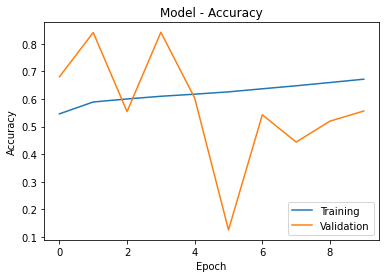

In [30]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()